# Benson Project

WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. There has been a significant drop in attendance at the last WTWY Gala. This will affect the direction and efficacy of WTWY’s mission statement - that is unacceptable. 

We recently obtained NYC MTA data and would like to make a valuable contribution to increasing their overall membership rates.

Our data gives us insight into which stations and days of the week have the most foot-traffic - thus optimizing volunteer placement for outreach. Our analysis even highlights specific turnstiles within a station!

Furthermore, trends by week and time are readily available. Complimentary graphs for viewing pleasure.

Currently, we are in the process of combining census data with our findings to give further insight into the demographics of foot-traffic, that is to say, WTWY's future potential donors and members.

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.1
Numpy version: 1.12.1


In [4]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.precision', 3)

Download 3 MTA turnstile data files (170513, 170506 and 170429).
Read the data into a pandas DataFrame.

In [4]:
MTA_May13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt')
MTA_May06 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt')
MTA_Apr29 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt')

MTAdata_orig = pd.concat([MTA_Apr29, MTA_May06, MTA_May13], ignore_index = True)

MTAdata_orig.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
pickle.dump(MTAdata_orig, open("MTAdata_orig", "wb"))
MTAdata_orig.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,00:00:00,REGULAR,6148025,2082120
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,20:00:00,REGULAR,6148910,2082368
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,00:00:00,REGULAR,6149116,2082395
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,04:00:00,REGULAR,6149149,2082398
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,08:00:00,REGULAR,6149178,2082419
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,12:00:00,REGULAR,6149307,2082504


The 'DATE' columns are of type object. It prevent us from doing time series analysis. 
Create a new column, 'day' to get the weekday for each result.

In [6]:
MTAdata = pickle.load(open("MTAdata_orig", "rb"))

In [7]:
MTAdata['day'] = MTAdata['DATE'].apply(lambda x: pd.to_datetime(x, format = '%m/%d/%Y').weekday())

In [8]:
MTAdata.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,00:00:00,REGULAR,6148025,2082120,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,20:00:00,REGULAR,6148910,2082368,5
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,00:00:00,REGULAR,6149116,2082395,6
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,04:00:00,REGULAR,6149149,2082398,6
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,08:00:00,REGULAR,6149178,2082419,6
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,12:00:00,REGULAR,6149307,2082504,6


C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
Create 'turnstile' column, which is defined by 'C/A' and 'SCP'.

In [90]:
print(MTAdata[['C/A']].drop_duplicates().shape)
print(MTAdata[['UNIT']].drop_duplicates().shape)
print(MTAdata[['SCP']].drop_duplicates().shape)
print(MTAdata[['STATION']].drop_duplicates().shape)
print(MTAdata[['C/A', 'STATION']].drop_duplicates().shape)
print(MTAdata[['C/A', 'STATION', 'UNIT']].drop_duplicates().shape)
print(MTAdata[['STATION', 'UNIT']].drop_duplicates().shape)
print(MTAdata[['STATION', 'UNIT', 'C/A']].drop_duplicates().shape)
print(MTAdata[['STATION', 'UNIT', 'SCP']].drop_duplicates().shape)
print(MTAdata[['STATION', 'SCP']].drop_duplicates().shape)
print(MTAdata[['C/A', 'SCP']].drop_duplicates().shape)
print(MTAdata[['C/A', 'UNIT', 'SCP']].drop_duplicates().shape)
print(MTAdata[['C/A', 'UNIT', 'SCP', 'STATION']].drop_duplicates().shape)

(732, 1)
(466, 1)
(230, 1)
(374, 1)
(732, 2)
(732, 3)
(482, 2)
(732, 3)
(4697, 3)
(4145, 2)
(4697, 2)
(4697, 3)
(4697, 4)


In [9]:
MTAdata['turnstile'] = MTAdata['C/A'] + ' ' + MTAdata['SCP']

In [10]:
MTAdata.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,00:00:00,REGULAR,6148025,2082120,5,A002 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123,5,A002 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157,5,A002 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251,5,A002 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316,5,A002 02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,20:00:00,REGULAR,6148910,2082368,5,A002 02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,00:00:00,REGULAR,6149116,2082395,6,A002 02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,04:00:00,REGULAR,6149149,2082398,6,A002 02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,08:00:00,REGULAR,6149178,2082419,6,A002 02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,12:00:00,REGULAR,6149307,2082504,6,A002 02-00-00


Get the entries and exits for each turnstile.

In [11]:
MTAdata['turnstile entries'] = MTAdata.groupby(['turnstile'])['ENTRIES'].transform(lambda x: x.diff())
MTAdata['turnstile exits'] = MTAdata.groupby(['turnstile'])['EXITS'].transform(lambda x: x.diff())

Some of the entry and exit numbers are negative. We assume they are due to the counter errors from the original data. 
The rows with negative entry or exit numbers will be removed.

In [12]:
MTAdata = MTAdata[(MTAdata['turnstile entries'] > 0) & (MTAdata['turnstile exits'] > 0)]

Create a column of 'TurnstileDay traffic' which sums up the entries and exits for each turnstile on each weekday.

In [13]:
MTAdata['turnstile traffic'] = MTAdata['turnstile entries'] + MTAdata['turnstile exits']

We set up a cutoff of 5000 for each turnstile traffic by assuming that it will take at least 3 sec for one person to get through the turnstile.

In [14]:
MTAdata = MTAdata[(MTAdata['turnstile traffic'] < 5000)]
MTAdata.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,turnstile,turnstile entries,turnstile exits,turnstile traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123,5,A002 02-00-00,55.0,3.0,58.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157,5,A002 02-00-00,21.0,34.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251,5,A002 02-00-00,123.0,94.0,217.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316,5,A002 02-00-00,300.0,65.0,365.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,20:00:00,REGULAR,6148910,2082368,5,A002 02-00-00,386.0,52.0,438.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,00:00:00,REGULAR,6149116,2082395,6,A002 02-00-00,206.0,27.0,233.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,04:00:00,REGULAR,6149149,2082398,6,A002 02-00-00,33.0,3.0,36.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,08:00:00,REGULAR,6149178,2082419,6,A002 02-00-00,29.0,21.0,50.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,12:00:00,REGULAR,6149307,2082504,6,A002 02-00-00,129.0,85.0,214.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2017,16:00:00,REGULAR,6149514,2082560,6,A002 02-00-00,207.0,56.0,263.0


Save MTA dataframe locally.

In [15]:
pickle.dump(MTAdata, open("MTAdata_clean", "wb"))

Load MTA dataframe.

In [5]:
MTAdata = pickle.load(open("MTAdata_clean", "rb"))

In [6]:
MTAdata.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,turnstile,turnstile entries,turnstile exits,turnstile traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,04:00:00,REGULAR,6148080,2082123,5,A002 02-00-00,55.0,3.0,58.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,08:00:00,REGULAR,6148101,2082157,5,A002 02-00-00,21.0,34.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,12:00:00,REGULAR,6148224,2082251,5,A002 02-00-00,123.0,94.0,217.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,16:00:00,REGULAR,6148524,2082316,5,A002 02-00-00,300.0,65.0,365.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/22/2017,20:00:00,REGULAR,6148910,2082368,5,A002 02-00-00,386.0,52.0,438.0


Get traffic data for each turnstile at each day of the week

In [7]:
TurnstileDayTotalTraffic = pd.DataFrame(MTAdata.groupby(['C/A','STATION','turnstile','day'])['turnstile traffic'].sum()).reset_index()

In [8]:
TurnstileDayTotalTraffic.head(10)

,C/A,STATION,turnstile,day,turnstile traffic
0,A002,59 ST,A002 02-00-00,0,6052.0
1,A002,59 ST,A002 02-00-00,1,5972.0
2,A002,59 ST,A002 02-00-00,2,6211.0
3,A002,59 ST,A002 02-00-00,3,6300.0
4,A002,59 ST,A002 02-00-00,4,6328.0
5,A002,59 ST,A002 02-00-00,5,3643.0
6,A002,59 ST,A002 02-00-00,6,2899.0
7,A002,59 ST,A002 02-00-01,0,3304.0
8,A002,59 ST,A002 02-00-01,1,3811.0
9,A002,59 ST,A002 02-00-01,2,4558.0


Get total traffic data for each station at each day of the week

In [9]:
StationDayTotalTraffic = pd.DataFrame(TurnstileDayTotalTraffic.groupby(['STATION','day'])['turnstile traffic'].sum()).reset_index()

In [10]:
StationDayTotalTraffic.head(10)

,STATION,day,turnstile traffic
0,1 AV,0,122304.0
1,1 AV,1,137411.0
2,1 AV,2,140604.0
3,1 AV,3,142805.0
4,1 AV,4,145416.0
5,1 AV,5,78426.0
6,1 AV,6,65153.0
7,103 ST,0,156227.0
8,103 ST,1,165289.0
9,103 ST,2,169931.0


Get the average traffic data for each day of the week.

In [11]:
DayTotalTraffic = pd.DataFrame(StationDayTotalTraffic.groupby(['day'])['turnstile traffic'].sum()).reset_index()

In [12]:
DayAverageTraffic = DayTotalTraffic
DayAverageTraffic['turnstile traffic'] = DayAverageTraffic['turnstile traffic'] / 3
dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DayAverageTraffic['dayname'] = DayAverageTraffic['day'].apply(lambda x: dayofweek[x])
DayAverageTraffic

,day,turnstile traffic,dayname
0,0,9.976e+06,Monday
1,1,1.055e+07,Tuesday
2,2,1.069e+07,Wednesday
3,3,1.082e+07,Thursday
4,4,1.041e+07,Friday
5,5,6.053e+06,Saturday
6,6,5.128e+06,Sunday


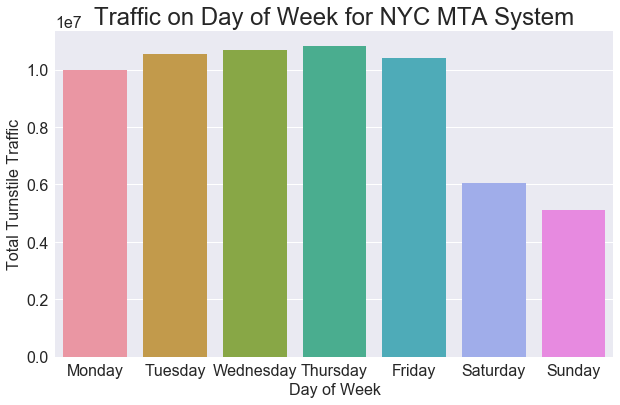

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 32.0, 'axes.titlesize': 24, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
sns.set(rc = rc)
sns.barplot(x = DayAverageTraffic['dayname'], y = DayAverageTraffic['turnstile traffic'])
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Turnstile Traffic');
ax.set_title('Traffic on Day of Week for NYC MTA System')
fig.savefig("Traffic on Day of Week for NYC MTA System.png")

In [15]:
StationWeekdayTotalTraffic = pd.DataFrame(StationDayTotalTraffic[StationDayTotalTraffic['day'] < 5].groupby(['STATION'])['turnstile traffic'].sum()).reset_index()
StationWeekdayAverageTraffic = StationWeekdayTotalTraffic
StationWeekdayAverageTraffic['turnstile traffic'] = StationWeekdayAverageTraffic['turnstile traffic']/15
pd.DataFrame(StationWeekdayAverageTraffic.sort_values('turnstile traffic',ascending = False)).head(10)

,STATION,turnstile traffic
61,34 ST-PENN STA,312259.800
232,GRD CNTRL-42 ST,283873.867
59,34 ST-HERALD SQ,227598.733
46,23 ST,216605.400
14,14 ST-UNION SQ,200417.333
349,TIMES SQ-42 ST,188466.133
225,FULTON ST,182730.800
109,86 ST,163220.800
68,42 ST-PORT AUTH,161554.000
85,59 ST COLUMBUS,139153.333


In [16]:
AverageDailyTraffic = DayAverageTraffic['turnstile traffic'].sum()/7
AverageDailyTraffic

9090372.904761905

In [17]:
TopStations = [('TIMES SQ-42 ST'), ('GRD CNTRL-42 ST'), ('34 ST-HERALD SQ'), ('14 ST-UNION SQ'), ('34 ST-PENN STA')]

In [18]:
from collections import defaultdict
TopStationDailyTraffic = defaultdict(pd.DataFrame)

In [28]:
for station in TopStations:
    TopStationDailyTraffic[station] = pd.DataFrame(MTAdata[MTAdata['STATION'] == station].groupby(['turnstile'])['turnstile traffic'].sum()).reset_index()
    TopStationDailyTraffic[station]['turnstile traffic'] = TopStationDailyTraffic[station]['turnstile traffic']/21
    TopStationDailyTraffic[station] = TopStationDailyTraffic[station].sort_values('turnstile traffic',ascending = False)
    print(TopStationDailyTraffic[station].head())

        turnstile  turnstile traffic
0   A021 01-00-00           6797.429
31  R148 01-00-00           6342.238
41  R151 00-00-03           6264.143
42  R151 00-00-04           6159.048
39  R151 00-00-01           6135.762
        turnstile  turnstile traffic
44  R240 00-00-00          11095.476
32  R238 00-03-01           8392.619
31  R238 00-03-00           8335.286
45  R240 00-00-01           7259.238
29  R238 00-00-06           7212.619
        turnstile  turnstile traffic
10  A025 01-06-00           8327.476
25  N506 00-00-00           8251.667
38  N506 00-05-05           8152.524
5   A025 01-00-00           7425.762
0   A022 01-00-00           7214.333
        turnstile  turnstile traffic
5   A033 02-00-05           8367.095
4   A033 02-00-04           8352.000
26  R221 01-00-00           7799.381
3   A033 02-00-03           7431.667
31  R221 01-03-02           7256.048
        turnstile  turnstile traffic
11  N067 00-05-00           7054.857
62  R138 00-00-01           6747.190
6

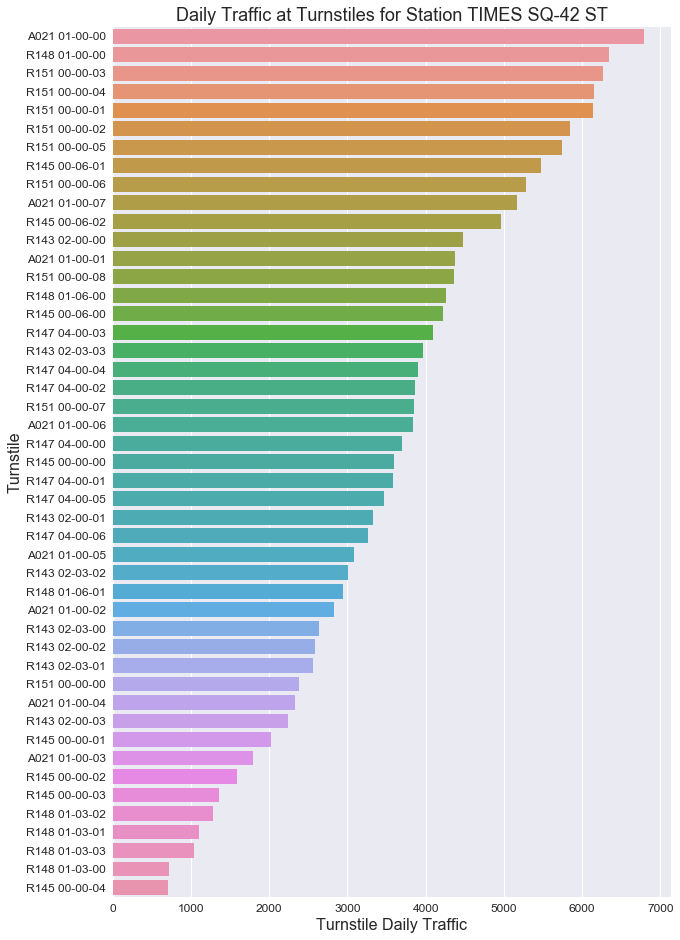

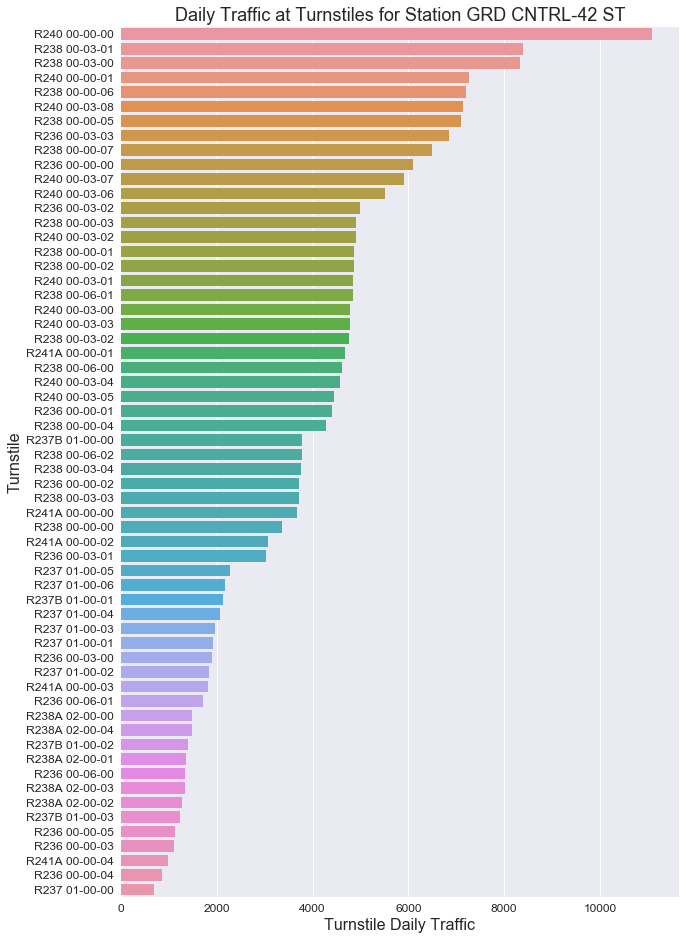

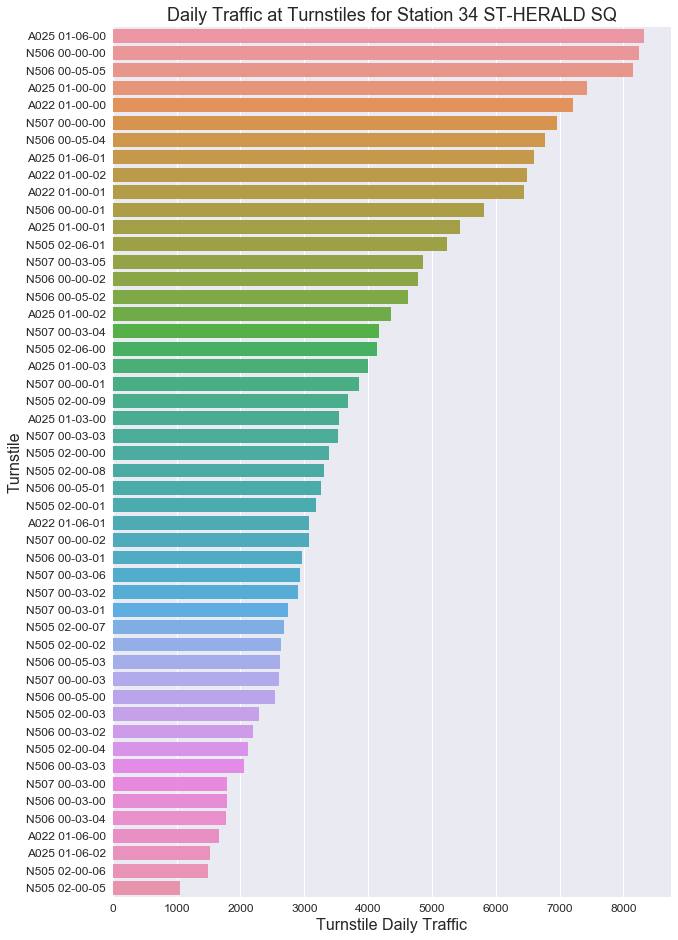

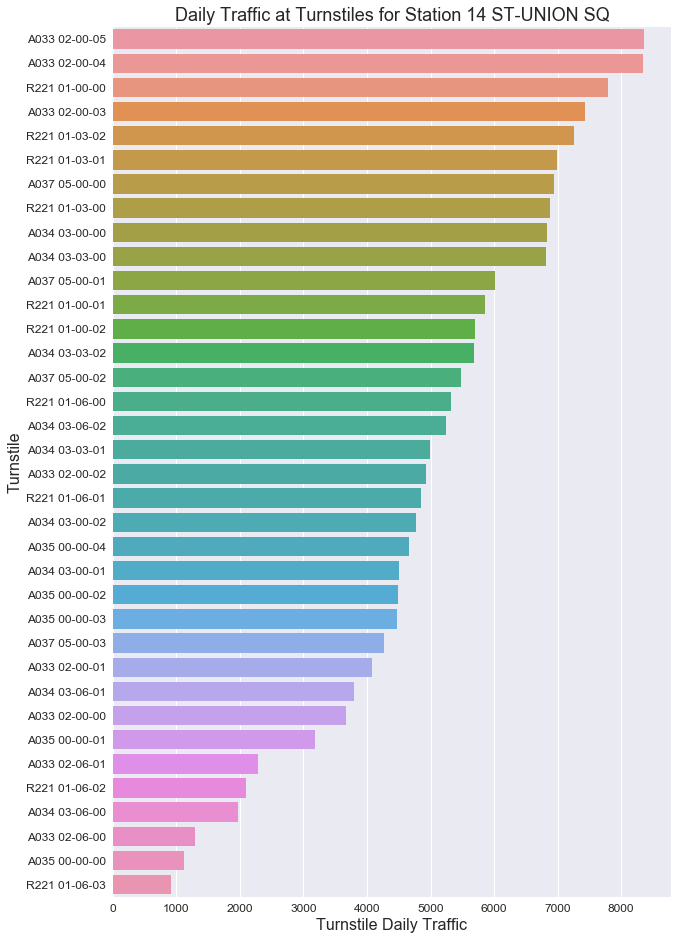

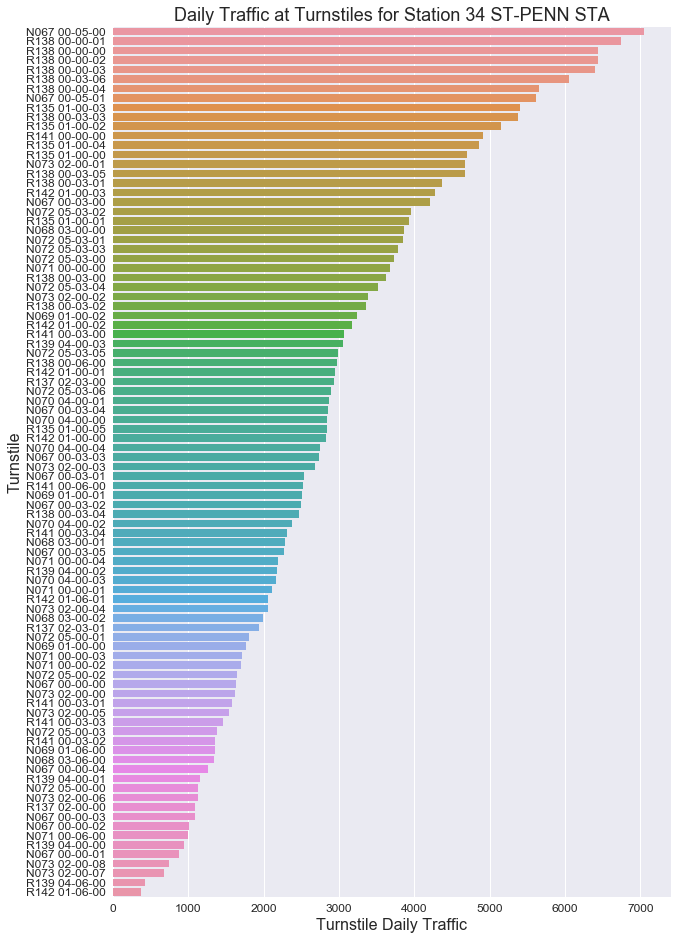

In [43]:

for index, station in enumerate(TopStations):
    fig, ax = plt.subplots(figsize = (10, 16), ncols = 1, nrows = 1)
    #fig.tight_layout()
    rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 32.0, 'axes.titlesize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
    sns.set(rc = rc)
    ax.set_title('Daily Traffic at Turnstiles for Station %s' %station)
    sns.barplot(x = TopStationDailyTraffic[station]['turnstile traffic'], y = TopStationDailyTraffic[station]['turnstile'], ax=ax)
    ax.set_xlabel('Turnstile Daily Traffic')
    ax.set_ylabel('Turnstile')
    plt.savefig('Daily Traffic at Turnstiles for Station %s.png' %station);

In [44]:
TopStationDailyTraffic_CA = defaultdict(pd.DataFrame)

In [45]:
for station in TopStations:
    TopStationDailyTraffic_CA[station] = pd.DataFrame(MTAdata[MTAdata['STATION'] == station].groupby(['C/A'])['turnstile traffic'].sum()).reset_index()
    TopStationDailyTraffic_CA[station]['turnstile traffic'] = TopStationDailyTraffic_CA[station]['turnstile traffic']/21
    TopStationDailyTraffic_CA[station] = TopStationDailyTraffic_CA[station].sort_values('turnstile traffic',ascending = False)
    print(TopStationDailyTraffic_CA[station].head())

    C/A  turnstile traffic
5  R151          46019.000
0  A021          30209.238
3  R147          25878.667
1  R143          24777.476
2  R145          23935.952
     C/A  turnstile traffic
3   R238          85285.571
5   R240          65277.286
0   R236          37161.810
6  R241A          14248.714
1   R237          12931.762
    C/A  turnstile traffic
3  N506          57591.667
1  A025          41209.524
4  N507          39425.238
2  N505          35199.381
0  A022          24870.429
    C/A  turnstile traffic
4  R221          53670.762
1  A034          44604.095
0  A033          40398.429
3  A037          22712.667
2  A035          17923.571
    C/A  turnstile traffic
9  R138          64587.095
0  N067          35664.476
5  N072          30689.095
7  R135          26885.238
6  N073          18499.857


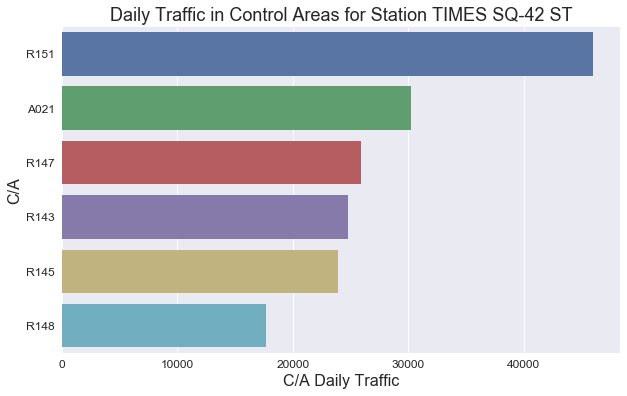

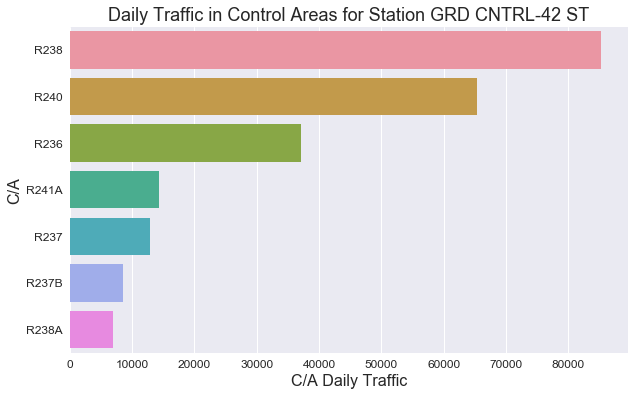

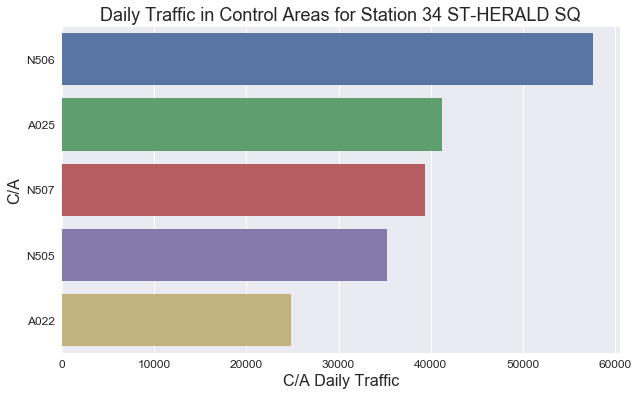

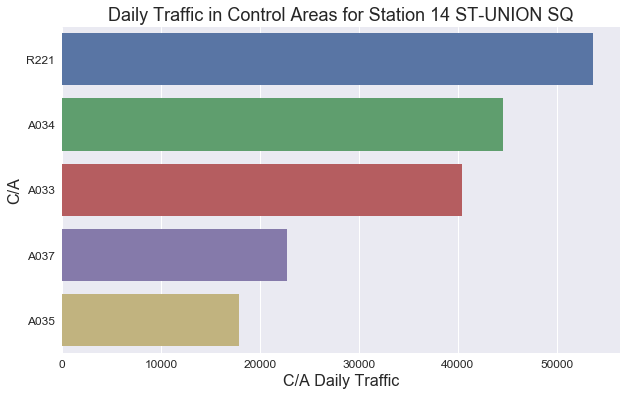

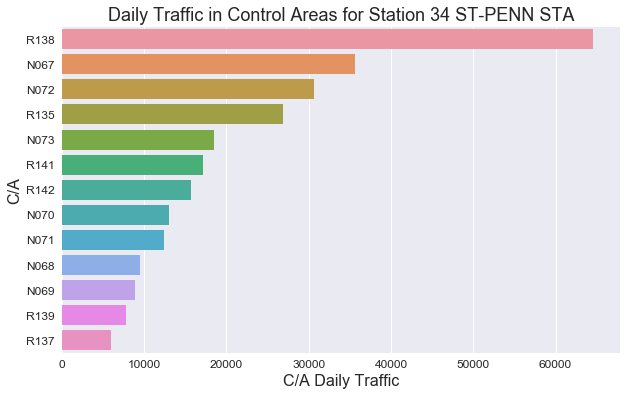

In [47]:
'''fig, ax = plt.subplots(figsize = (10, 80), ncols = 1, nrows = 5)
fig.tight_layout()
rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 32.0, 'axes.titlesize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
sns.set(rc = rc)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.2    # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)'''

for index, station in enumerate(TopStations):
    fig, ax = plt.subplots(figsize = (10, 6), ncols = 1, nrows = 1)
    ax.set_title('Daily Traffic in Control Areas for Station %s' %station)
    sns.barplot(x = TopStationDailyTraffic_CA[station]['turnstile traffic'], y = TopStationDailyTraffic_CA[station]['C/A'], ax=ax)
    ax.set_xlabel('C/A Daily Traffic')
    ax.set_ylabel('C/A');
    plt.savefig('Daily Traffic in Control Areas for Station %s.png' %station)